In [1]:
from IPython.core.display import display, HTML

display(HTML("<style>#notebook-container {width: 90% !important; }</style>"))
# 마크다운 폰트 
display(HTML("<style>.rendered_html{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# DataFrame 테이블 폰트 
display(HTML("<style>.rendered_html table{font-family: 'D2Coding'; font-size: 16pt; line-height: 140%;}</style>"))
# 출력창 폰트
display(HTML("<style>pre{font-family: 'D2Coding', font-size: 16pt;}.rendered_html>ul>li{margin: 10px}</style>"))
display(HTML("<style>div.output_area>pre, div.output_subarea>pre{font-size: 16pt; !important; line-height: 140%;}</style>"))
# 코드셀 폰트 
display(HTML("<style> .CodeMirror pre {font-family: 'D2Coding'; font-size: 18pt !important; line-height: 140%;}</style>"))

# Task1. Ensemble 모형을 활용한 최적 분류기 탐색

- 0. 대상 데이터
    - `from sklearn.datasets import load_breast_cancer`

- 1. 데이터 전처리 & 변환
    - 1.1 결측치 존재 여부 확인  `isna()`
    - 1.2 데이터 타입 확인 `info()`
        - 1.2.1 범주형 데이터가 있다면? one-hot 으로 변환 하세요.  `pd.get_dummies()`
    - 1.3 필요시 스케일링 작업 진행  `MinMaxScaler, StandradScaler`

- 2. EDA (시각적 탐색)
    - 2.1 각 독립변수의 의 분포 그리세요 (`sns.pariplot`)
    - 2.2 각 독립변수의 상관관계 heatmap 을 그리세요 (`plt.histplot`)

- 2. 데이터 분할 
    - 범주를 기준으로 7:3 데이터로 분할할 것 (`train_test_split`)

- 3. Ensemble 모형을 활용, 최적의 분류기 찾으세요. 

- 4. 해당 모형의 정확도 평가
    - 4.1 Confusion Matrix 
    - 4.2 정밀도, 재현율, F1-Score 
    - 4.3 ROC Curve 계산 

# 1) 데이터 전처리 및 변환 

- 1.1 결측치 존재 여부 확인
- 1.2 데이터 타입 확인
    - 1.2.1 범주형 데이터가 있다면? one-hot 으로 변환 하세요. 
- 1.3 필요시 스케일링 작업 진행 

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve, precision_recall_curve, confusion_matrix

# bunch
cancer = load_breast_cancer()

# Pandas DataFrame 정의
data = pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [3]:
data.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [4]:
data["target"] = cancer["target"]

In [5]:
data.isna().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [7]:
pd.value_counts(data.target)

1    357
0    212
Name: target, dtype: int64

## Binning 실험

In [8]:
# 범주형 데이터가 없음 -> OneHot Encoding 하지 않음. 

In [9]:
data['mean perimeter'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: mean perimeter, dtype: float64

In [10]:
data['c_mean_perimeter'] = pd.cut(data['mean perimeter'], 
                                  bins=[20, 50, 70, 90, 110, 130, 150], right=True, labels = [0, 1, 2, 3, 4, 5])

In [11]:
data[['mean perimeter', 'c_mean_perimeter']].head(5)

,mean perimeter,c_mean_perimeter
0,122.80,4
1,132.90,5
2,130.00,4
3,77.58,2
4,135.10,5


In [12]:
data['c_mean_perimeter']

0      4
1      5
2      4
3      2
4      5
      ..
564    5
565    5
566    3
567    5
568    0
Name: c_mean_perimeter, Length: 569, dtype: category
Categories (6, int64): [0 < 1 < 2 < 3 < 4 < 5]

In [13]:
# One-Hot 
# data = pd.get_dummies(data)

In [14]:
# 정규화 진행 

# 2). EDA (시각적 탐색)

- 2.1 각 독립변수의 의 분포 그리세요 (`sns.pariplot`)
- 2.2 각 독립변수의 상관관계 heatmap 을 그리세요 (`plt.histplot`)

In [15]:
data

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,c_mean_perimeter
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0,4
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0,5
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0,4
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0,2
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0,5
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0,5
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0,3
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0,5


In [16]:
# plt.figure(figsize=(15, 15))
# sns.pairplot(data.head(10))
# plt.show()

In [20]:
len(data.columns)

32

In [22]:
data.drop('c_mean_perimeter', axis=1, inplace=True)

In [23]:
data.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


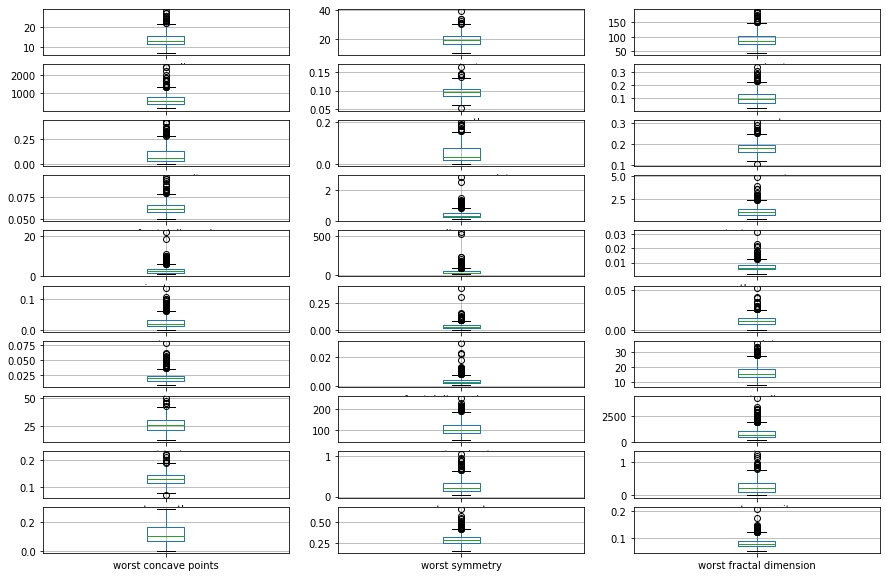

In [28]:
# 컬럼별로 box-plot
data.iloc[:, :data.shape[1]-1].plot(kind='box', figsize=(15, 10), 
                                    subplots=True, 
                                    layout=(10, 3), grid=True)  #               constrained_layout=True) 
# 그리고자 하는 data의 컬럼 수와 layout의 수가 동일해야 함. 10*3 ->30, 
# 그리고자 하는 data의 컬럼의 수가 30 
plt.show()

# 3). 데이터 분할 

- 범주를 기준으로 7:3 데이터로 분할할 것 

In [29]:
# 독립변수
features = [x for x in data.columns if x != 'target']
# 종속변수
label = 'target'

In [30]:
# 정규화 진행 
X = data[features]
y = data[label]

X_new = MinMaxScaler().fit_transform(X)

In [33]:
X.head(2)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.8,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.6,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.9,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.8,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902


In [31]:
X_new

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

In [34]:
X_new = pd.DataFrame(X_new, columns=cancer['feature_names'])

In [35]:
X_new

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,0.605518,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,0.141323,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,0.211247,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,1.000000,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,0.186816,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.690000,0.428813,0.678668,0.566490,0.526948,0.296055,0.571462,0.690358,0.336364,0.132056,...,0.623266,0.383262,0.576174,0.452664,0.461137,0.178527,0.328035,0.761512,0.097575,0.105667
565,0.622320,0.626987,0.604036,0.474019,0.407782,0.257714,0.337395,0.486630,0.349495,0.113100,...,0.560655,0.699094,0.520892,0.379915,0.300007,0.159997,0.256789,0.559450,0.198502,0.074315
566,0.455251,0.621238,0.445788,0.303118,0.288165,0.254340,0.216753,0.263519,0.267677,0.137321,...,0.393099,0.589019,0.379949,0.230731,0.282177,0.273705,0.271805,0.487285,0.128721,0.151909
567,0.644564,0.663510,0.665538,0.475716,0.588336,0.790197,0.823336,0.755467,0.675253,0.425442,...,0.633582,0.730277,0.668310,0.402035,0.619626,0.815758,0.749760,0.910653,0.497142,0.452315


In [36]:
x_train, x_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, stratify=y)

In [39]:
pd.value_counts(y)

1    357
0    212
Name: target, dtype: int64

In [37]:
pd.value_counts(y_train)

1    250
0    148
Name: target, dtype: int64

In [38]:
pd.value_counts(y_test)

1    107
0     64
Name: target, dtype: int64

# 4) Ensemble 모형을 활용, 최적의 분류기 찾으세요.

In [40]:
model = RandomForestClassifier(max_depth=3).fit(x_train, y_train)

In [42]:
list(range(1, 11, 1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [43]:
base_model = RandomForestClassifier()

params = {
    'max_depth' : range(1, 11, 1),
}

In [44]:
gs = GridSearchCV(base_model, params, cv=5).fit(x_train, y_train)

In [46]:
pd.DataFrame(gs.cv_results_).sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
8,0.161585,0.001238,0.010971,0.000051,9,{'max_depth': 9},0.9000,0.9500,0.9750,0.962025,0.974684,0.952342,0.027754,1
7,0.161737,0.000650,0.011144,0.000335,8,{'max_depth': 8},0.9000,0.9500,0.9625,0.962025,0.962025,0.947310,0.024122,2
3,0.159604,0.002557,0.010948,0.000073,4,{'max_depth': 4},0.9000,0.9625,0.9625,0.949367,0.962025,0.947278,0.024168,3
5,0.161516,0.000880,0.010998,0.000072,6,{'max_depth': 6},0.8875,0.9625,0.9750,0.949367,0.962025,0.947278,0.030969,3
4,0.161471,0.002576,0.010979,0.000047,5,{'max_depth': 5},0.8875,0.9500,0.9625,0.949367,0.974684,0.944810,0.030125,5


In [47]:
gs.best_params_

{'max_depth': 9}

In [48]:
best_model = RandomForestClassifier(**gs.best_params_).fit(x_train, y_train)

In [49]:
best_model.score(x_train, y_train), best_model.score(x_test, y_test)

(1.0, 0.9649122807017544)

# 5. 해당 모형의 정확도 평가

- 5.1 Confusion Matrix 
- 5.2 정밀도, 재현율, F1-Score 
- 5.3 ROC Curve 계산 

In [51]:
# sklearn.metrics (실제값, 예측값)
confusion_matrix(y_test, best_model.predict(x_test))

array([[ 59,   5],
       [  1, 106]])

In [53]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# fpr, tpr 
fpr, tpr, thresholds = roc_curve(y_test, best_model.predict(x_test)) 
rf_auc = auc(fpr, tpr) # RoC Curve를 그리는 요소인 fpr, tpr

In [54]:
rf_auc

0.9562646028037383

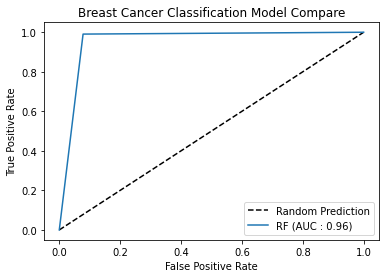

In [55]:
# Roc Curve 시각화
label = "RF (AUC : %.2f)" % rf_auc 
plt.plot([0, 1], [0, 1], 'k--', label="Random Prediction")
plt.plot(fpr, tpr, label=label)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Breast Cancer Classification Model Compare')
plt.legend()
plt.show()